Type-II Diabetes
1. With a unit increase in BMI the probability of being diabetic increases by about 1.5% among overweight and obese individuals and by 0.5% among the non-overweight individuals in the IV-Probit model.
2. High alcohol intake increases diabetes risk among middle-aged men. However, more moderate levels of alcohol consumption do not increase risk of type 2 diabetes in either middle-aged men or women.
3. Smokers are 30 to 40 percent more likely to develop type 2 diabetes than nonsmokers.8 Smoking can also make managing the disease and regulating insulin levels more difficult because high levels of nicotine can lessen the effectiveness of insulin, causing smokers to need more insulin to regulate blood sugar levels
4. A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes.

Heart Stroke
0. gender, age, hypertension, glucose, bmi, smoke
1. High BMI, high col, diabetic, low MAP

Hypertension
1. High BMI, old age, diabetic, high col = yes
2. MAP: 87-109 yes; 77-92 no

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Creating DataFrame**

In [ ]:
df = pd.read_csv("/content/cardio_final.csv")
df.head()

age_in_years  gender  height  ...  daiabetes II  hypertension  stroke
0            50       2     168  ...             0             0       0
1            55       1     156  ...             1             1       1
2            52       1     165  ...             0             1       1
3            48       2     169  ...             0             1       1
4            48       1     156  ...             0             0       0

[5 rows x 19 columns]

In [ ]:
df.describe()

age_in_years        gender  ...  hypertension        stroke
count  70000.000000  70000.000000  ...  70000.000000  70000.000000
mean      53.338686      1.349571  ...      0.802429      0.527300
std        6.765294      0.476838  ...      0.398170      0.499258
min       30.000000      1.000000  ...      0.000000      0.000000
25%       48.000000      1.000000  ...      1.000000      0.000000
50%       54.000000      1.000000  ...      1.000000      1.000000
75%       58.000000      2.000000  ...      1.000000      1.000000
max       65.000000      2.000000  ...      1.000000      1.000000

[8 rows x 19 columns]

**Checking for null values**

In [ ]:
df.isnull().sum()

age_in_years      0
gender            0
height            0
weight            0
BMI               0
ap_hi             0
ap_lo             0
MAP               0
cholesterol       0
Heart_Rate        0
Max_Heart_Rate    0
gluc              0
smoke             0
alco              0
active            0
cardio            0
daiabetes II      0
hypertension      0
stroke            0
dtype: int64

In [ ]:
df.head()

age_in_years  gender  height  ...  daiabetes II  hypertension  stroke
0            50       2     168  ...             0             0       0
1            55       1     156  ...             1             1       1
2            52       1     165  ...             0             1       1
3            48       2     169  ...             0             1       1
4            48       1     156  ...             0             0       0

[5 rows x 19 columns]

**Outlier detection**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

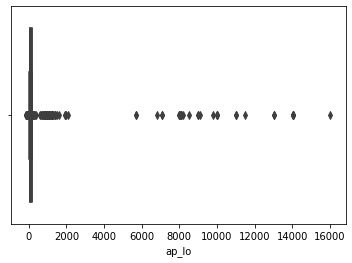

In [ ]:
sns.boxplot(df['height'])
sns.boxplot(df['weight'])
sns.boxplot(df['ap_hi'])
sns.boxplot(df['ap_lo'])

**Using quantile to remove outliers**

In [ ]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

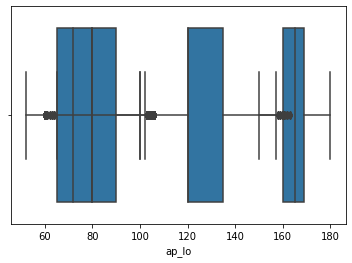

In [ ]:
sns.boxplot(df['height'])
sns.boxplot(df['weight'])
sns.boxplot(df['ap_hi'])
sns.boxplot(df['ap_lo'])

**Classifying data**

In [ ]:
df['age_bin'] = pd.cut(df['age_in_years'], [0,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], 
                       labels=['0-20', '20-30', '30-35', '35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','90-95','95-100'])

In [ ]:
rating = []
for row in df['BMI']:
    if row < 18.5 :    rating.append(1)                   #UnderWeight
    elif row > 18.5 and row  < 24.9:   rating.append(2)   #NormalWeight
    elif row > 24.9 and row < 29.9:  rating.append(3)     #OverWeight
    elif row > 29.9 and row < 34.9:  rating.append(4)     #ClassObesity_1
    elif row > 34.9 and row < 39.9:  rating.append(5)     #ClassObesity_2
    elif row > 39.9 and row < 49.9:  rating.append(6)     #ClassObesity_3
    elif row > 49.9:  rating.append('Error')
    else:           rating.append('Not_Rated')

In [ ]:
df['BMI_Class'] = rating

In [ ]:
map_values = []
for row in df['MAP']:
    if row < 69.9:    map_values.append(1)                  #Low
    elif row > 70 and row  < 79.9:   map_values.append(2)   #Normal
    elif row > 79.9 and row < 89.9:  map_values.append(3)   #Normal
    elif row > 89.9 and row < 99.9:  map_values.append(4)   #Normal
    elif row > 99.9 and row < 109.9:  map_values.append(5)  #High
    elif row > 109.9 and row < 119.9:  map_values.append(6) #Normal
    elif row > 119.9:  map_values.append(7)
        
    else:           map_values.append('Not_Rated')

In [ ]:
df['MAP_Class'] = map_values

In [ ]:
df_male = df.query("gender == 1")
df_female = df.query("gender == 2")

In [ ]:
df_male.head()

age_in_years  gender  height  weight  ...  stroke  age_bin  BMI_Class  MAP_Class
1            55       1     156    85.0  ...       1    50-55  Not_Rated          5
2            52       1     165    64.0  ...       1    50-55          2          4
4            48       1     156    56.0  ...       0    45-50          2          2
5            60       1     151    67.0  ...       1    55-60          3          4
6            61       1     157    93.0  ...       1    60-65          5          4

[5 rows x 22 columns]

In [ ]:
df_female.head()

age_in_years  gender  height  weight  ...  stroke  age_bin  BMI_Class  MAP_Class
0             50       2     168    62.0  ...       0    45-50          2          4
3             48       2     169    82.0  ...       1    45-50          3          6
7             62       2     178    95.0  ...       1    60-65          4          5
11            52       2     173    60.0  ...       0    50-55          2          4
12            41       2     165    60.0  ...       0    40-45          2          4

[5 rows x 22 columns]

**Plotting graphs for Target Value for cardio**

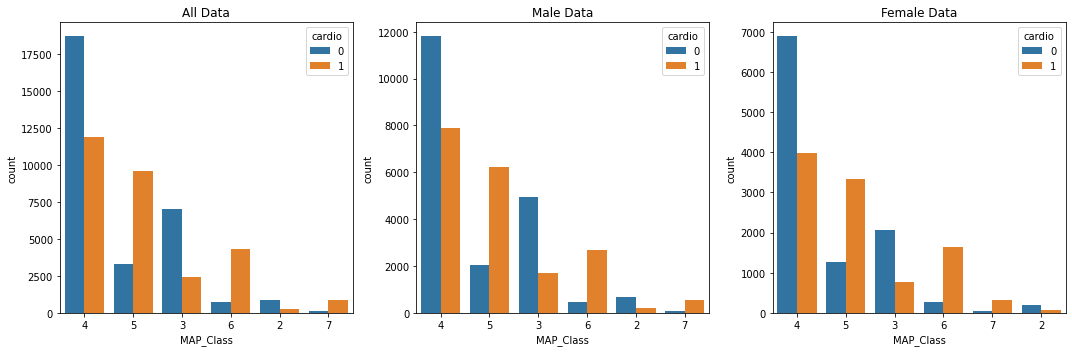

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df['MAP_Class'],order=df['MAP_Class'].value_counts().index,hue=df['cardio'],ax=axs[0])
sns.countplot(x=df_male['MAP_Class'],order=df_male['MAP_Class'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['MAP_Class'],order=df_female['MAP_Class'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

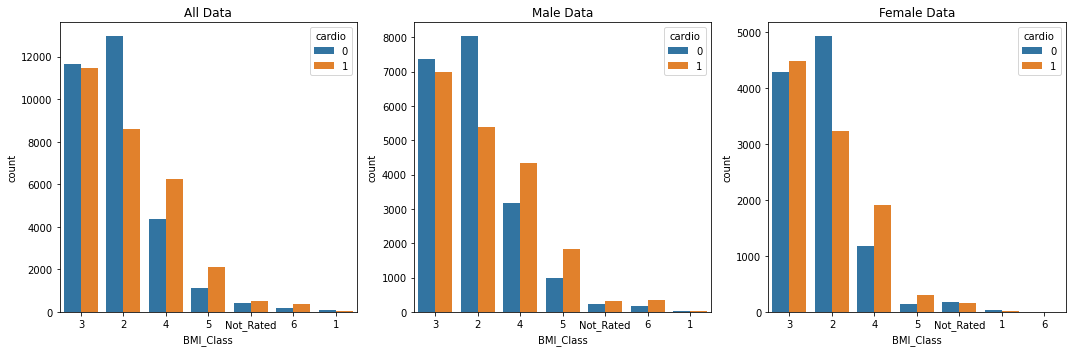

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df['BMI_Class'],order=df['BMI_Class'].value_counts().index,hue=df['cardio'],ax=axs[0])
sns.countplot(x=df_male['BMI_Class'],order=df_male['BMI_Class'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['BMI_Class'],order=df_female['BMI_Class'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

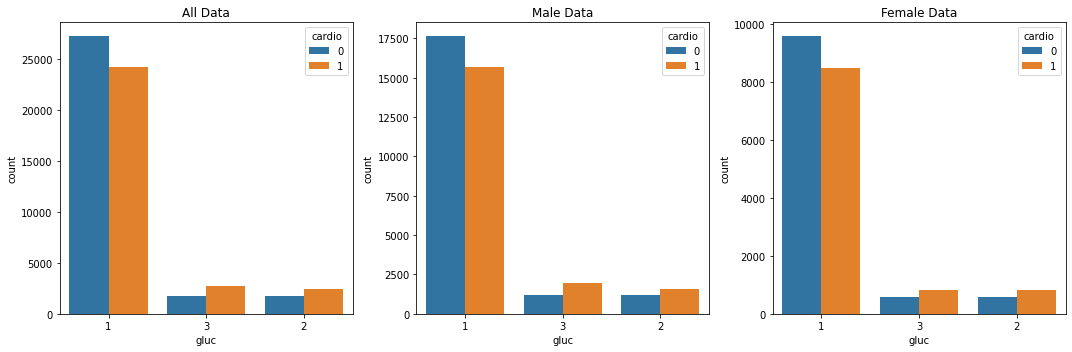

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df['gluc'],order=df['gluc'].value_counts().index,hue=df['cardio'],ax=axs[0])
sns.countplot(x=df_male['gluc'],order=df_male['gluc'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['gluc'],order=df_female['gluc'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

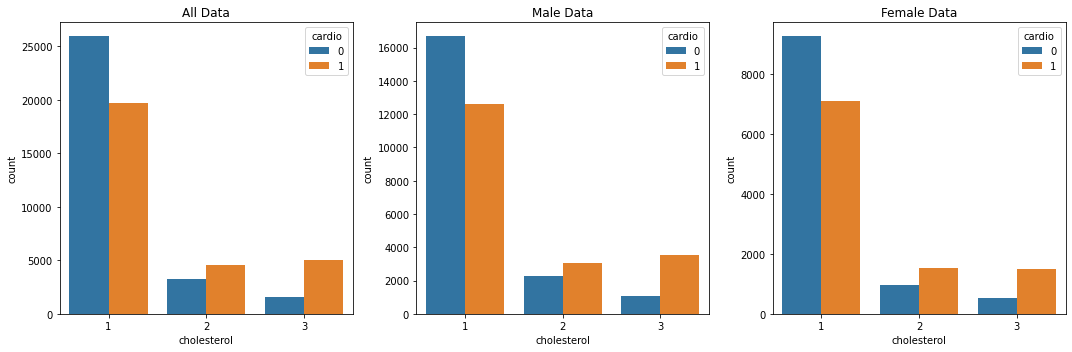

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df['cholesterol'],order=df['cholesterol'].value_counts().index,hue=df['cardio'],ax=axs[0])
sns.countplot(x=df_male['cholesterol'],order=df_male['cholesterol'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['cholesterol'],order=df_female['cholesterol'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

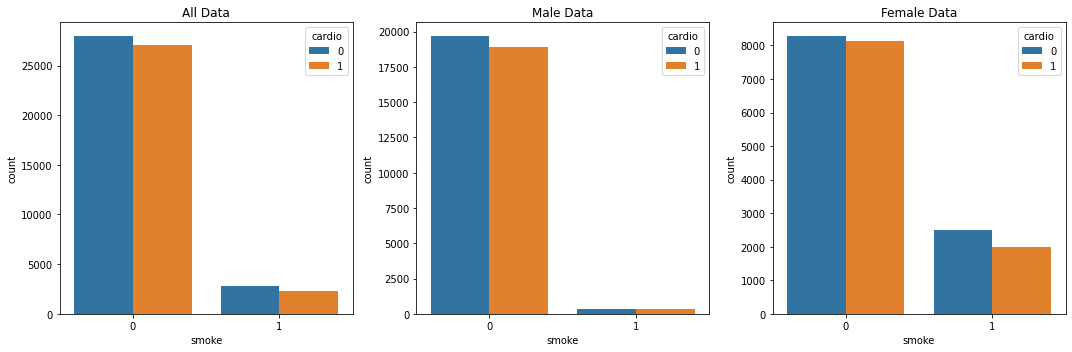

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df['smoke'],order=df['smoke'].value_counts().index,hue=df['cardio'],ax=axs[0])
sns.countplot(x=df_male['smoke'],order=df_male['smoke'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['smoke'],order=df_female['smoke'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

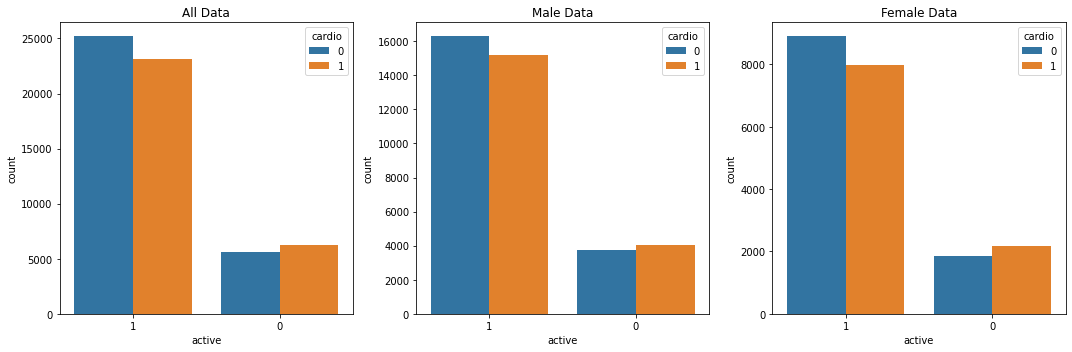

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df['active'],order=df['active'].value_counts().index,hue=df['cardio'],ax=axs[0])
sns.countplot(x=df_male['active'],order=df_male['active'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['active'],order=df_female['active'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

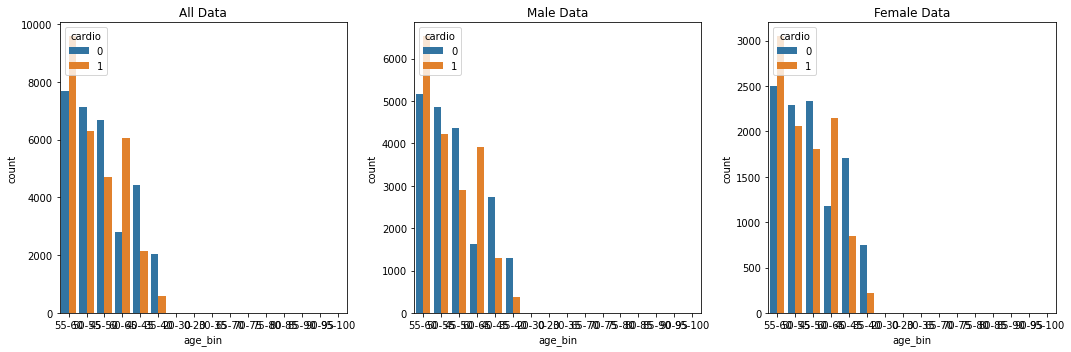

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df['age_bin'],order=df['age_bin'].value_counts().index,hue=df['cardio'],ax=axs[0])
sns.countplot(x=df_male['age_bin'],order=df_male['age_bin'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['age_bin'],order=df_female['age_bin'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['age_in_years', 'gender', 'height', 'weight', 'BMI', 'ap_hi', 'ap_lo',
       'MAP', 'cholesterol', 'Heart_Rate', 'Max_Heart_Rate', 'gluc', 'smoke',
       'alco', 'active', 'cardio', 'daiabetes II', 'hypertension', 'stroke',
       'age_bin', 'BMI_Class', 'MAP_Class'],
      dtype='object')

**Using iloc to make numpy arrays x and y**

In [ ]:
x=df.iloc[:,0:15].values
y=df.iloc[:,-8:-4].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Model Selection**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [ ]:
models = {
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
}

**Model traing and evaluation**

In [ ]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print('-'*30)

Training Model KNN 
--------------
Training Accuracy: 0.7187454534117598
Testing Accuracy: 0.6390389891096516
------------------------------
Training Model DT 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.9983373514007814
------------------------------
Training Model RF 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.9962590406517583
------------------------------


In [ ]:
df

age_in_years  gender  height  ...  age_bin  BMI_Class  MAP_Class
0                50       2     168  ...    45-50          2          4
1                55       1     156  ...    50-55  Not_Rated          5
2                52       1     165  ...    50-55          2          4
3                48       2     169  ...    45-50          3          6
4                48       1     156  ...    45-50          2          2
...             ...     ...     ...  ...      ...        ...        ...
69993            54       1     172  ...    50-55          2          5
69994            58       1     165  ...    55-60          3          5
69995            53       2     168  ...    50-55          3          4
69998            61       1     163  ...    60-65          3          4
69999            56       1     170  ...    55-60  Not_Rated          4

[60142 rows x 22 columns]

**Correlation Matrix**

In [ ]:
cor1 = df[["daiabetes II", "BMI", "gluc", "smoke",	"alco", "age_in_years"]]

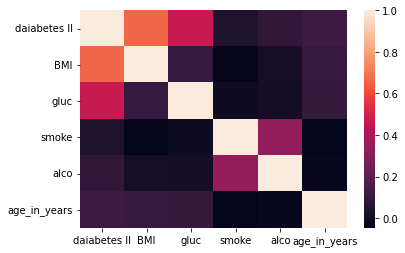

In [ ]:
sns.heatmap(cor1.corr())
plt.show()

In [ ]:
cor2 = df[["hypertension", "daiabetes II", "BMI", "age_in_years", "cholesterol", "MAP"]]

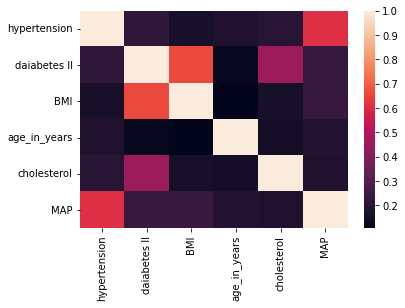

In [ ]:
sns.heatmap(cor2.corr())
plt.show()

In [ ]:
cor3 = df[["stroke", "hypertension", "daiabetes II", "BMI", "age_in_years", "smoke", "cholesterol", "MAP"]]

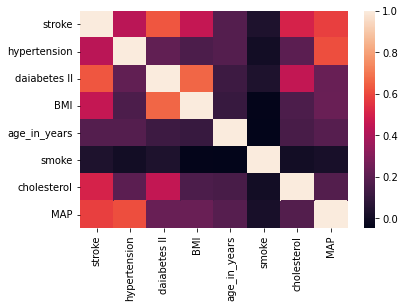

In [ ]:
sns.heatmap(cor3.corr())
plt.show()

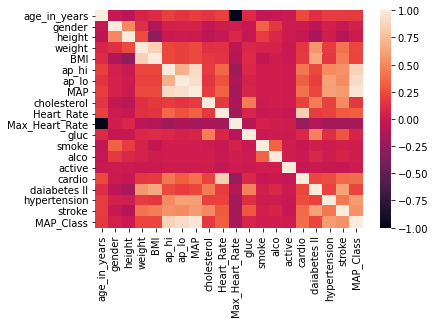

In [ ]:
sns.heatmap(df.corr())
plt.show()

**Decision Tree Image**

In [ ]:
from six import StringIO
from IPython.display  import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(model[1],out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.332974 to fit



**Dumping Model**

In [ ]:
import pickle
pickle.dump(model[1], open('MODEL_CVD.pkl', 'wb'))